<a href="https://colab.research.google.com/github/ofunkey/demo/blob/main/new_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit -q

     |████████████████████████████████| 9.9 MB 7.4 MB/s 
     |████████████████████████████████| 111 kB 48.3 MB/s 
     |████████████████████████████████| 4.3 MB 38.3 MB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
     |████████████████████████████████| 181 kB 53.6 MB/s 
     |████████████████████████████████| 164 kB 33.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 128 kB 35.0 MB/s 
     |████████████████████████████████| 793 kB 38.4 MB/s 
     |████████████████████████████████| 380 kB 50.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.9.1 which is incompatible.
google-colab 1.0.0 requires ipytho

In [ ]:
%%writefile app.py
import streamlit as st
st.write('# Hello World')
st.write('## Run Streamlit on Colab without ngrok')

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

In the preliminary analysis, we saw more engagement with Omicron/Delta variant (especially Omicron) compared to Beta. The metrics we have looked at previously to make this claim were like_count, reply_count, and retweet_count. The in-depth analysis will focus on the rich text feature and uncover some interesting insights about how twitter users responsed about Covid-19.

In [ ]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

We will continue where we left off by uploading the saved file from the preliminary analysis in order to focus on performing sentiment analysis.

In [ ]:
#Method 1 to load the data is to upload it from your personal computer
#load the csv file 'tweets_add_cols.csv' and 'tweets_EDA_clean.csv' which was downloaded from the Team-68_Project folder
#tweets_EDA_clean.csv is to simplify the first 20 chunks of code
#tweets_add_cols.csv is complimentary columns to author description and text columns
from google.colab import files
uploaded = files.upload()

Saving tweets_EDA_clean.csv to tweets_EDA_clean.csv


In [ ]:
#load clean data
tweets = pd.read_csv('tweets_EDA_clean.csv', encoding='utf-8',index_col=0)

In [ ]:
tweets.drop_duplicates(inplace = True)

In [ ]:
# looking at the last 15 tweet texts before removing all the junk 
tweets[['text']].head(15)


text
0                  So typical https://t.co/IidUKML06T
1   With the ongoing pandemic, it’s hard to tell i...
2   Interesting read.\n#COVID19 #globalpandemic #v...
3   .@miraina057:  Actually #TrumpCrimeFamily will...
4   Biden to receive first dose of coronavirus vac...
5   I’d very strongly advise my friends and family...
6   If only we had shut down for two lousy months....
7   honestly they need to cancel all of these show...
8   Nurse Collapses on Live Television shortly aft...
9   Maskless Santa tests positive for COVID-19 aft...
10  How the digital media and content sector has b...
11  US experts debate: Who should be next in line ...
12  COVID-19 UPDATE: 190 cases today (39 reported ...
13  ⚡️ “America's Marshall Islanders Confront a Co...
14  It really is time to eat the rich. https://t.c...

Once the data is loaded, we will load the needed modules for the analysis such as nltk for tokenization and textblob to process text data.

In [ ]:
# Here is the start of the common nlp preprocessing steps such as lemmatization, removing stop words, and tokenization. 
# First we import the appropriate libraries 
import nltk      
import re                                   # library for regular expression operations

import string                               # for string operations
from nltk.corpus import stopwords           # module for stop words that come with NLTK
from nltk.stem import PorterStemmer         # module for stemming
from nltk.stem import WordNetLemmatizer     # module for stemming
from nltk.tokenize import TweetTokenizer    # module for tokenizing strings
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize



from textblob import TextBlob
from textblob import Word          
nltk.download('stopwords')  
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import random

#import visualization modules
import matplotlib.pyplot as plt  
import seaborn as sns
#import pillow


## Word Cloud 
from wordcloud import WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


pd.set_option('display.max_colwidth', -1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 3.1 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:

sentimentAnalyser = SentimentIntensityAnalyzer()


**Data Cleaning**

In [ ]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?://[^\s\n\r]+', '', text)

  return text


In [ ]:
tweets['text'] = tweets['text'].apply(cleanText)

# here we are removing any stop words from the twitter texts 
stopwords_ = stopwords.words('english') 

tweets['text'] = tweets['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_))

# lemmatization of the texts 
tweets['text'] = tweets['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [ ]:
# Apply the function to every row in the "text" column and output the results into a new column "sentiment_score"
tweets['sentiment_score'] = tweets['text'].apply(calculate_sentiment)
tweets

id      conversation_id            author_id  \
0     1340040283321331712  1340040283321331712  1318949540917956609   
1     1339797620773011456  1339797620773011456  200847251             
2     1339948913017667584  1339948913017667584  1020413358955204609   
3     1340002369954865153  1340002369954865153  340434787             
4     1340000394647400448  1340000394647400448  929029860             
...                   ...                  ...        ...             
7706  1467611733166596097  1467611733166596097  4744477719            
7707  1467476824062148609  1467476824062148609  169196719             
7708  1467439230242934784  1467439230242934784  1396968124574953474   
7709  1467539464037838858  1467539464037838858  2183003916            
7710  1467331926818275330  1467331926818275330  2153538967            

                     created_at  \
0     2020-12-18 21:04:34+00:00   
1     2020-12-18 05:00:19+00:00   
2     2020-12-18 15:01:30+00:00   
3     2020-12-18 18:33:55+00:00   
4     2020-12-18 18:26:04+00:00   
...                         ...   
7706  2021-12-05 21:47:58+00:00   
7707  2021-12-05 12:51:53+00:00   
7708  2021-12-05 10:22:30+00:00   
7709  2021-12-05 17:00:48+00:00   
7710  2021-12-05 03:16:07+00:00   

                                                                                                                                                                                               text  \
0     So typical                                                                                                                                                                                      
1     With ongoing pandemic, it’s hard tell school university opening door student time soon we've compiled tip help survive another Covid-19 school year (just case!)                                
2     Interesting read.\nCOVID19 globalpandemic vaccine TrustThePlan\n                                                                                                                                
3     .: Actually TrumpCrimeFamily siphon-off contribution COVID19 charities! \n\nShame DonTheCon Trumpers!                                                                                           
4     Biden receive first dose coronavirus vaccine Monday                                                                                                                                             
...                                                   ...                                                                                                                                             
7706  Facebook Instagram deleted hundred account linked China spread disinformation US pressuring WHO blame COVID-19 pandemic Beijing                                                                 
7707  INFORME COVID-19                                                                                                                                                                                
7708  pp funny swear. one time he's like santa's unavailable bc covid-19 sticker nowhere seen, sudden he's saying shit like "oh u care planet now??" billkin nagged abt wasting water early morning   
7709  Because can't control cancer.                                                                                                                                                                   
7710  We can't keep up... Slow TF down🤷🏾‍♀️🤷🏾‍♀️🤷🏾‍♀️ covid19 coronavirus therona                                                                                                                     

                   source  like_count  reply_count  retweet_count  \
0     Twitter for iPad     0           0            0               
1     Buffer               0           0            0               
2     Twitter for Android  0           0            0               
3     Twitter Web App      0           0            0               
4     Twitter W

In [ ]:
# function that will categorize the 'sentiment_score' column by Postive, Negative, or Neutral 
def getCategory(score):
  if score > 0.05:
    return 'Positive'
  elif score < -0.05:
    return 'Negative'
  else:
    return 'Neutral'

In [ ]:
# Analysis before data cleaning
tweets['analysis'] = tweets['sentiment_score'].apply(getCategory)
tweets.head(25)

id      conversation_id            author_id  \
0   1340040283321331712  1340040283321331712  1318949540917956609   
1   1339797620773011456  1339797620773011456  200847251             
2   1339948913017667584  1339948913017667584  1020413358955204609   
3   1340002369954865153  1340002369954865153  340434787             
4   1340000394647400448  1340000394647400448  929029860             
5   1340046487124758528  1340046487124758528  862090215585980416    
6   1340054460437970944  1340054460437970944  1047900240899002368   
7   1339809689861812224  1339809689861812224  1019356773008977920   
8   1339901286834032640  1339901286834032640  242437073             
9   1340058013311315975  1340058013311315975  1486117886            
10  1339979353791352834  1339979353791352834  953582283025469441    
11  1340078445196402690  1340078445196402690  215026562             
12  1340080424094150656  1340080424094150656  32135940              
13  1339940250194481162  1339940250194481162  1548489476            
14  1340010108097622018  1340010108097622018  4903076165            
15  1339988569104912384  1339988569104912384  743528157836251137    
16  1339996984451731457  1339996984451731457  16813285              
17  1339814848515870722  1339814848515870722  885601772             
18  1339748185519005697  1339748185519005697  1267839830915903488   
19  1340054697281953792  1340054697281953792  1144065374            
20  1340031043630469126  1340031043630469126  2282763848            
21  1339862181496631300  1339862181496631300  1270666821776089090   
22  1339808676580909057  1339808676580909057  1248065249917493253   
23  1339839596121759745  1339839596121759745  1000289506665345024   
24  1340009776529502209  1339926635051671557  1312126880741548033   

                   created_at  \
0   2020-12-18 21:04:34+00:00   
1   2020-12-18 05:00:19+00:00   
2   2020-12-18 15:01:30+00:00   
3   2020-12-18 18:33:55+00:00   
4   2020-12-18 18:26:04+00:00   
5   2020-12-18 21:29:14+00:00   
6   2020-12-18 22:00:55+00:00   
7   2020-12-18 05:48:17+00:00   
8   2020-12-18 11:52:15+00:00   
9   2020-12-18 22:15:02+00:00   
10  2020-12-18 17:02:28+00:00   
11  2020-12-18 23:36:13+00:00   
12  2020-12-18 23:44:05+00:00   
13  2020-12-18 14:27:05+00:00   
14  2020-12-18 19:04:40+00:00   
15  2020-12-18 17:39:05+00:00   
16  2020-12-18 18:12:31+00:00   
17  2020-12-18 06:08:47+00:00   
18  2020-12-18 01:43:53+00:00   
19  2020-12-18 22:01:51+00:00   
20  2020-12-18 20:27:52+00:00   
21  2020-12-18 09:16:52+00:00   
22  2020-12-18 05:44:15+00:00   
23  2020-12-18 07:47:07+00:00   
24  2020-12-18 19:03:21+00:00   

                                                                                                                                                                                                                                 text  \
0   So typical                                                                                                                                                                                                                          
1   With ongoing pandemic, it’s hard tell school university opening door student time soon we've compiled tip help survive another Covid-19 school year (just case!)                                                                    
2   Interesting read.\nCOVID19 globalpandemic vaccine TrustThePlan\n                                                                                                                                                                    
3   .: Actually TrumpCrimeFamily siphon-off contribution COVID19 charities! \n\nShame DonTheCon Trumpers!                                                                                                                               
4   Biden receive first dose coronavirus vaccine Monday                                                                                                                                                   

In [ ]:
tweets[['text','sentiment_score','analysis']].head(25)

text  \
0   So typical                                                                                                                                                                                                                          
1   With ongoing pandemic, it’s hard tell school university opening door student time soon we've compiled tip help survive another Covid-19 school year (just case!)                                                                    
2   Interesting read.\nCOVID19 globalpandemic vaccine TrustThePlan\n                                                                                                                                                                    
3   .: Actually TrumpCrimeFamily siphon-off contribution COVID19 charities! \n\nShame DonTheCon Trumpers!                                                                                                                               
4   Biden receive first dose coronavirus vaccine Monday                                                                                                                                                                                 
5   I’d strongly advise friend family please avoid travel right now. \n\n                                                                                                                                                               
6   If shut two lousy months.\n\nWe'd summer fall would normal.\n\n"Muh freedums... Muh freedums..."\n\nYeah, two month acknowledging Mother Nature real much huh?                                                                      
7   honestly need cancel show little ,,,,                                                                                                                                                                                               
8   Nurse Collapses Live Television shortly receiving COVID-19 VACCINE より                                                                                                                                                               
9   Maskless Santa test positive COVID-19 South Carolina event family                                                                                                                                                                   
10  How digital medium content sector affected covid-19                                                                                                                                                                                 
11  US expert debate: Who next line vaccine? Flipboard10forToday via                                                                                                                                                                    
12  COVID-19 UPDATE: 190 case today (39 reported state [historic data] &amp; 151 reported Health District). Of 190, 117 confirmed positives, 60 probable positive &amp; 13 suspect positives.\n👉 News Release:                          
13  ⚡️ “America's Marshall Islanders Confront Covid-19 Disaster”\n\n                                                                                                                                                                    
14  It really time eat rich.                                                                                                                                                                                                            
15  The pen still mightier sword &amp; expose oligarch like Charles Koch (oil &amp; gas) funding magats, domestic terrorists, &amp; GOP trying turn democracy autocracy. To believe science, vaccines, &amp; Covid19 endangers us.      
16  Watch latest edition Mayor's Report. Find link topic mentioned video (and transcript), including COVID-19 information resources, update City's DEI initiative Police Department's policy review reform work.                        
17  juxtapose 40% reduction vac

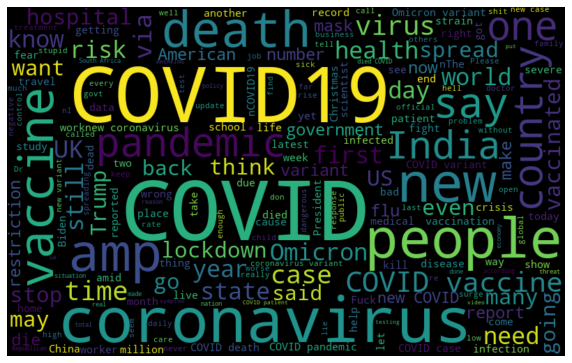

In [ ]:
# generate the wordclouse 
from wordcloud import WordCloud

all = ' '.join([category for category in tweets[tweets['analysis']=='Negative']['text']])
wordCloud = WordCloud(random_state = 21, max_font_size = 119, width=800 , height=500).generate(all)
plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

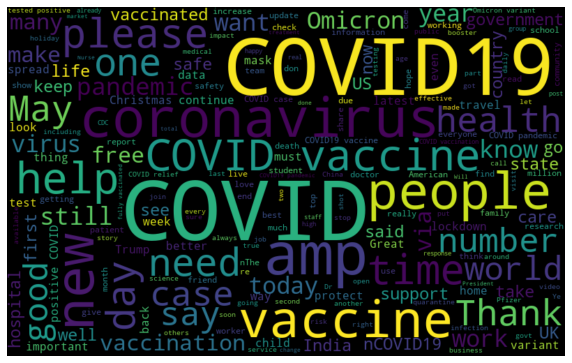

In [ ]:
# generate the wordclouse 
from wordcloud import WordCloud

all = ' '.join([category for category in tweets[tweets['analysis']=='Positive']['text']])
wordCloud = WordCloud(random_state = 21, max_font_size = 119, width=800 , height=500).generate(all)
plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Working with another clean function - Data preprocessing

In [ ]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [ ]:
# Load data
tweets8 = pd.read_csv('tweets_EDA_clean.csv', encoding='utf-8', index_col=0)

In [ ]:
tweets8.drop_duplicates(inplace = True)

In [ ]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Data Pre-Processing
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# here we are removing any stop words from the twitter texts 
#stop_words = stopwords.words('english')

def clean_text(tweet):
  # function to clean tweets

    temp = tweet.lower()
    temp = re.sub(r'\\n'," ", temp) # removing \n -newline, replacing with a space
    temp = re.sub(r'&\S+',"  ", temp) #remove &amp, &gt
    temp = re.sub("@[a-z0-9_]+"," ", temp)
    temp = re.sub("#[a-z0-9_]+","  ", temp)
    temp = re.sub(r'http\S+', "  ", temp) # 
    temp = re.sub(r'covid19|covid-19|covid -19|covid- 19|coronavirus|virus|covid', " covid ", temp) 
    temp = re.sub(r'vaccine|vaccination',"vaccine", temp)
    temp = re.sub(r'covid\s+vaccine',"vaccine", temp)
    temp = re.sub('[()!?]', '  ', temp)
    temp = re.sub('\[.*?\]','  ', temp)
    temp = re.sub("[^a-z0-9]", "  ", temp)  #removed the \ - _

    # Remove stop words from the twitter texts 
    stop_words = stopwords.words('english')
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp




In [ ]:

# Clean data
tweets8['pre_cleaned_text'] = tweets8['text'].apply(clean_text)

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
tweets8['cleaned_text'] = tweets8['pre_cleaned_text'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(word, pos='v') for word in x.split()))



In [ ]:
# Initialize VADER
sentimentAnalyser = SentimentIntensityAnalyzer()

In [ ]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [ ]:
# function that will categorize the 'sentiment_score' column by Postive, Negative, or Neutral 
def getCategory(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
    
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Sentiment Analysis after cleaning
# Apply the function to every row in the "text" column and output the results into a new column "sentiment_score"
tweets8['sentiment_score'] = tweets8['cleaned_text'].apply(calculate_sentiment)
tweets8['analysis'] = tweets8['sentiment_score'].apply(getCategory)
tweets8[['text', 'pre_cleaned_text', 'cleaned_text', 'sentiment_score',	'analysis']]

text  \
0     So typical https://t.co/IidUKML06T                                                                                                                                                                                                                                            
1     With the ongoing pandemic, it’s hard to tell if schools and universities will be opening their doors to students any time soon so we've compiled some tips to help you survive another Covid-19 school year (just in case!) https://t.co/T2hZk7Dfy1 https://t.co/o4vbcs1Aqy   
2     Interesting read.\n#COVID19 #globalpandemic #vaccine #TrustThePlan\nhttps://t.co/CZ4EqgXVB7                                                                                                                                                                                   
3     .@miraina057:  Actually #TrumpCrimeFamily will siphon-off contributions from #COVID19 and other #charities!  \n\nShame on the #DonTheCon #Trumpers! https://t.co/Cy1UfO2vgW https://t.co/Z0BBGd5Gzl                                                                           
4     Biden to receive first dose of coronavirus vaccine on Monday https://t.co/OA1QblNfPA                                                                                                                                                                                          
...                                                                                    ...                                                                                                                                                                                          
7706  Facebook and Instagram have deleted hundreds of accounts linked to China that spread disinformation about the US pressuring the WHO to blame the COVID-19 pandemic on Beijing https://t.co/864hCxLLJP                                                                         
7707  INFORME COVID-19 https://t.co/0tGbMkcSvt                                                                                                                                                                                                                                      
7708  pp is so funny i swear. one time he's like santa's unavailable bc of covid-19 when the sticker was nowhere to be seen, then all of the sudden he's saying shit like "oh u care about the planet now??" after billkin nagged him abt wasting the water early in the morning    
7709  Because they can't control cancer. https://t.co/DPRPcJqy2Q                                                                                                                                                                                                                    
7710  We can't keep up... Slow it TF down🤷🏾‍♀️🤷🏾‍♀️🤷🏾‍♀️ #covid19 #coronavirus #therona https://t.co/SYGj9c1HKD                                                                                                                                                                     

                                                                                                                                                          pre_cleaned_text  \
0     typical                                                                                                                                                                
1     ongoing pandemic hard tell schools universities opening doors students time soon compiled tips help survive another covid school year case                             
2     interesting read                                                                                                                                                       
3     actually siphon contributions shame                                                                                                                                    
4     biden receive first dose vaccine monday                             

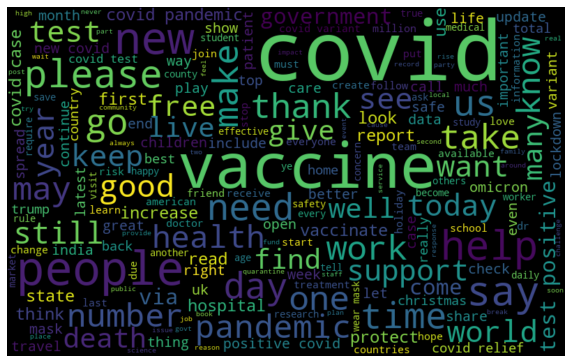

In [ ]:
# Positive Sentiment
from wordcloud import (WordCloud, get_single_color_func)

positive = ' '.join([category for category in tweets8[tweets8['analysis']=='Positive']['cleaned_text']])
wordCloud = WordCloud(random_state = 42, max_font_size = 119, width=800 , height=500).generate(positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

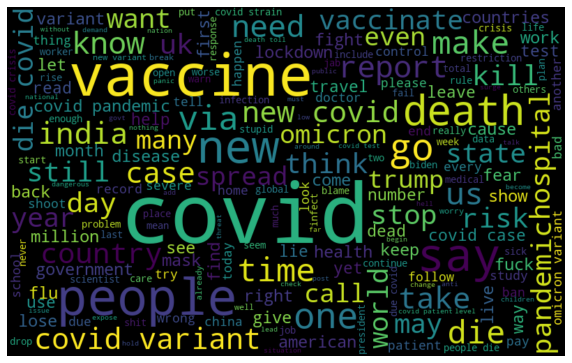

In [ ]:
# Negative Sentiment

negative = ' '.join([category for category in tweets8[tweets8['analysis']=='Negative']['cleaned_text']])
wordCloud = WordCloud(random_state = 21, max_font_size = 119, width=800 , height=500).generate(negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

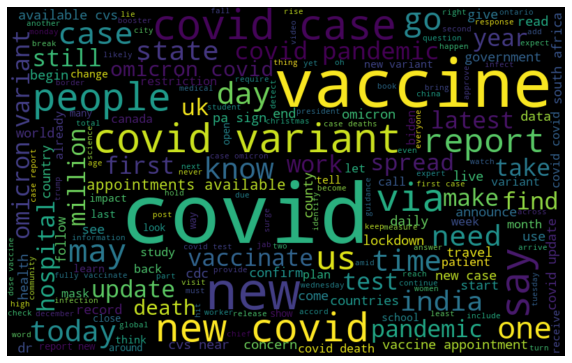

In [ ]:
# Neutral Sentiment

neutral= ' '.join([category for category in tweets8[tweets8['analysis']=='Neutral']['cleaned_text']])
wordCloud = WordCloud(random_state = 21, max_font_size = 119, width=800 , height=500).generate(neutral)
plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

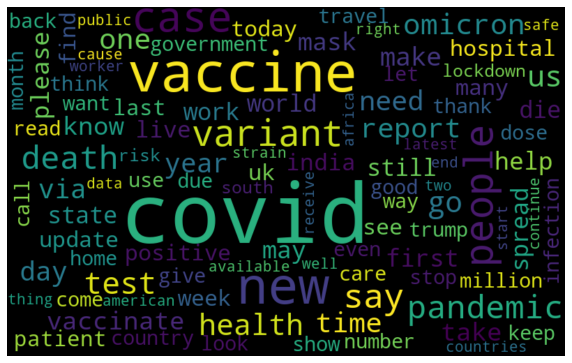

In [ ]:
# All sentiments with limit to max_words word, collocation

all_sentiments = ' '.join([category for category in tweets8['cleaned_text']])
wordCloud = WordCloud(max_words = 100, collocations = False, random_state = 21, max_font_size = 119, width=800 , height=500).generate(all_sentiments)
plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

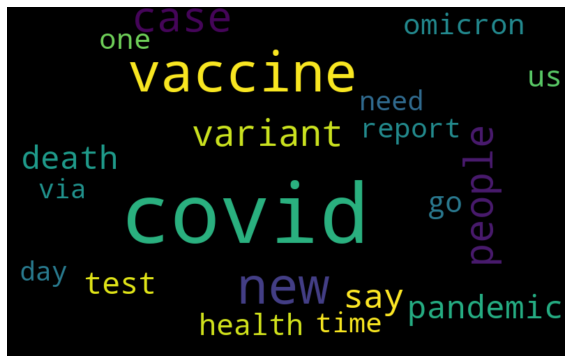

In [ ]:
# All sentiments with limit to max_words

all_sentiments = ' '.join([category for category in tweets8['cleaned_text']])
wordCloud = WordCloud(max_words = 20, collocations = False, random_state = 21, max_font_size = 119, width=800 , height=500).generate(all_sentiments)
plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

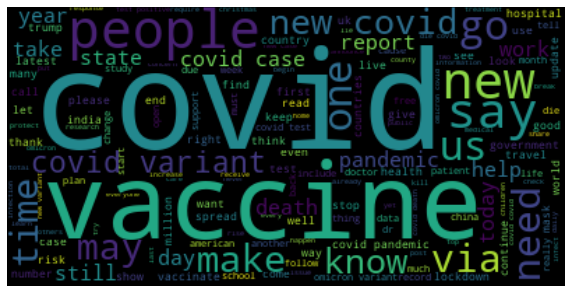

In [ ]:
wc = WordCloud().generate(all_sentiments)
# Plot
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
all_sentiments

'typical ongoing pandemic hard tell school universities open doors students time soon compile tip help survive another covid school year case interest read actually siphon contributions shame biden receive first dose vaccine monday strongly advise friends family please avoid travel right shut two lousy months summer fall would normal muh freedums muh freedums yeah two months acknowledge mother nature real much huh honestly need cancel show little nurse collapse live television shortly receive vaccine maskless santa test positive covid south carolina event families digital media content sector affect covid us experts debate next line vaccine via covid update 190 case today 39 report state 151 report health district 190 117 confirm positives 60 probable positives 13 suspect positives news release america marshall islanders confront covid disaster really time eat rich pen still mightier sword expose oligarchs like charles koch oil gas fund magats domestic terrorists gop try turn democracy

Feature extraction

In [ ]:
positive_tweets = tweets8[tweets8['analysis']== 'Positive']['cleaned_text']
negative_tweets = tweets8[tweets8['analysis']== 'Negative']['cleaned_text']
neutral_tweets = tweets8[tweets8['analysis']== 'Neutral']['cleaned_text']
cleaned_tweets = tweets8['cleaned_text']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Funtion to get embeddings of the documents (Feature extraction)
def get_word_counts(documents):
  '''
  Funtion to get embeddings of the documents 
  '''

  # Creating the CountVectorizer instance
  vectorizer = CountVectorizer()

  # Getting the tokenization and occurrence counting
  words_trans = vectorizer.fit_transform(documents)

  words = vectorizer.get_feature_names()


  return words_trans, words

In [ ]:
# call the function
X, word = get_word_counts(tweets8['cleaned_text'])

# Getting the bag of words as DataFrame
words_df = pd.DataFrame(
    list(zip(word, np.ravel(X.sum(axis=0)))), columns=["Word", "Word_Count_All_Sentiments"]
)

# sort values by column "Word_Count_All_Sentiments"
words_df = words_df.sort_values(by=["Word_Count_All_Sentiments"], ascending=False)
words_df.head(50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Word  Word_Count_All_Sentiments
3367   covid      4186                     
12222  vaccine    1018                     
8161   new        873                      
2608   case       742                      
8855   people     651                      
5308   get        642                      
10333  say        492                      
12253  variant    490                      
8684   pandemic   418                      
11512  test       389                      
12178  us         356                      
5703   health     356                      
5375   go         353                      
8452   omicron    333                      
12224  vaccines   331                      
9904   report     315                      
11650  time       315                      
8116   need       301                      
12312  via        291                      
8463   one        291                      
3646   deaths     282                      
7326   make       280                      
11371  take       270                      
12220  vaccinate  269                      
6795   know       269                      
8169   news       265                      
5740   help       254                      
7472   may        250                      
7086   like       249                      
281    2021       247                      
7438   mask       246                      
9053   please     240                      
4924   first      237                      
12710  work       230                      
10952  spread     225                      
11018  state      224                      
12722  world      222                      
3899   die        221                      
11062  still      221                      
6189   india      214                      
7127   live       212                      
12803  year       202                      
3620   day        186                      
12155  update     186                      
11683  today      184                      
11965  uk         183                      
10440  see        182                      
9157   positive   180                      
7399   many       180                      
6924   last       174

In [ ]:
#overall sentiment
total_tuple = []
for word in words_df.Word: # for each wor
  temp4 = []
  for ind, text in enumerate(tweets8['cleaned_text']):   # 
    if word in text:
      temp4.append(tweets8.loc[ind, 'sentiment_score']) # Look for the sentiment_score of matched word and append to temp4 list ##### [tweets8.loc[ind, 'sentiment_score'] for ind, text in enumerate(tweets8['cleaned_text']) if word in text]

  # get average of each word and append the word and the mean to total_tuple list
  average_num = sum(temp4)/(len(temp4) + 0.0001)
  total_tuple.append((word, average_num))

In [ ]:
total_tuple[:150]

[('covid', 0.0030814641326716917),
 ('vaccine', 0.05927447218863473),
 ('new', 0.007373087379178387),
 ('case', 0.039136032607786995),
 ('people', -0.03581230157054676),
 ('get', 0.05642292064749685),
 ('say', -0.03609935539291818),
 ('variant', -0.05214295856582839),
 ('pandemic', 0.056209429489242235),
 ('test', 0.17692179273975214),
 ('us', 0.020798664686852302),
 ('health', 0.11861318737825742),
 ('go', 0.08897867849869838),
 ('omicron', -0.02769561634511991),
 ('vaccines', 0.04512902801022178),
 ('report', 0.01079932523512575),
 ('time', 0.08097727577384181),
 ('need', 0.11238386562196385),
 ('via', -0.043528173312693506),
 ('one', 0.06626680878739585),
 ('deaths', -0.010546439101908327),
 ('make', 0.08461498818601085),
 ('take', 0.08450860269474728),
 ('vaccinate', 0.022729553748338058),
 ('know', 0.04665388416528929),
 ('news', 0.009415090786758198),
 ('help', 0.42288405689458175),
 ('may', 0.08163729519813553),
 ('like', 0.18077282007700995),
 ('2021', 0.0988238276445154),
 ('m

In [ ]:
# Filter positive abd negative sentiments into new lists as input for color_to_words
res_pos = [sub[0] for sub in total_tuple if sub[1] > 0.05]
res_neg = [sub[0] for sub in total_tuple if sub[1] < -0.05]
#res_neu = [sub[0] for sub in total_tuple if (sub[1] <= 0.05) & (sub[1] >= -0.05)]

In [ ]:
len(res_neg) 

4125

In [ ]:
len(set(res_neg))

4125

In [ ]:
from wordcloud import (WordCloud, get_single_color_func)

# https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html
class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

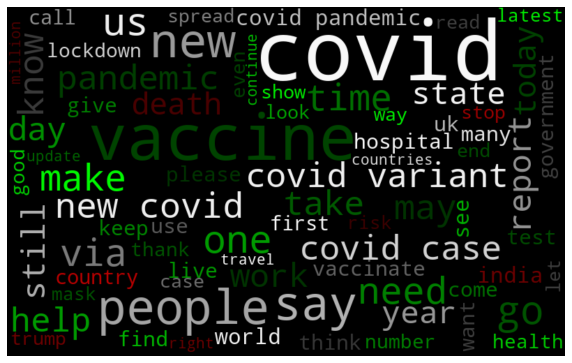

In [ ]:
# Generate a word cloud that assigns colors to words based on a predefined mapping from colors to words
wc = WordCloud(max_words = 75, random_state = 42, max_font_size = 119, width=800 , height=500).generate(all_sentiments)

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': res_pos,
    # will be colored with a red single color function
    'red': res_neg
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

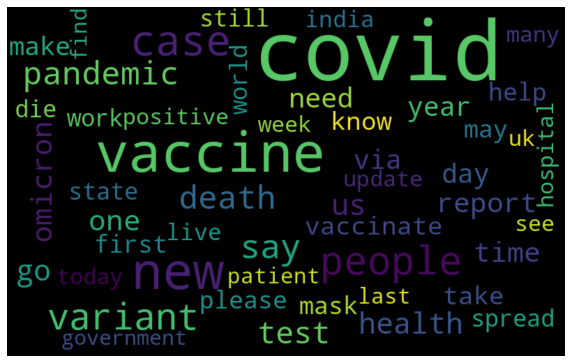

In [ ]:
all_sentiments = ' '.join([category for category in tweets8['cleaned_text']])
wordCloud = WordCloud(max_words = 50, collocations = False, random_state = 42, max_font_size = 119, width=800 , height=500).generate(all_sentiments)
plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
words_df.head(150).to_csv('words_df150.csv')

# New Section

Calculating the TF-IDF from a Corpus

In [ ]:
# TF-IDF - “Term Frequency — Inverse Data Frequency
# https://towardsdatascience.com/a-gentle-introduction-to-calculating-the-tf-idf-values-9e391f8a13e5


In [ ]:
# Funtion to get embeddings of the documents (Feature extraction)
def get_embeddings(documents):
  vectoriser = TfidfVectorizer()
  embeddings = vectoriser.fit_transform(documents)
  embeddings_dense = embeddings.toarray()
  
  # Retrieve the feature names/words in the list
  words_vocab = vectoriser.get_feature_names()
  return embeddings_dense, words_vocab

In [ ]:
embeddings, words_vocab = get_embeddings(cleaned_tweets)

# Getting the TF-IDF weight of each word in corpus as DataFrame
words_vocab_df = pd.DataFrame(
    list(zip(words_vocab, np.ravel(embeddings.mean(axis=0)))), columns=["Word", "TF-IDF_Positive_Sentiments"]
)

words_vocab_df = words_vocab_df.sort_values(by=["TF-IDF_Positive_Sentiments"], ascending=False)
words_vocab_df.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Word  TF-IDF_Positive_Sentiments
3367   covid      0.043828                  
12222  vaccine    0.018777                  
8161   new        0.017155                  
2608   case       0.014867                  
5308   get        0.013446                  
8855   people     0.012622                  
12253  variant    0.012505                  
10333  say        0.010416                  
5375   go         0.009694                  
8452   omicron    0.009468                  
11512  test       0.009080                  
8684   pandemic   0.008992                  
12178  us         0.008537                  
12312  via        0.008101                  
12224  vaccines   0.008092                  
9904   report     0.007631                  
5703   health     0.007564                  
8116   need       0.007486                  
11650  time       0.007356                  
6795   know       0.007353                  
8169   news       0.007214                  
8463   one        0.006968                  
12220  vaccinate  0.006900                  
7326   make       0.006865                  
3646   deaths     0.006536                  
11371  take       0.006500                  
7086   like       0.006311                  
4924   first      0.006260                  
9053   please     0.006207                  
7438   mask       0.006194

In [ ]:
# Negative Tweets TFIDF
embeddings, words_vocab = get_embeddings(negative_tweets)

# Getting the TF-IDF weight of each word in corpus as DataFrame
words_vocab_df = pd.DataFrame(
    list(zip(words_vocab, np.ravel(embeddings.mean(axis=0)))), columns=["Word", "TF-IDF_Negative_Sentiments"]
)

words_vocab_df = words_vocab_df.sort_values(by=["TF-IDF_Negative_Sentiments"], ascending=False)
words_vocab_df.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Word  TF-IDF_Negative_Sentiments
1652  covid     0.046698                  
4235  new       0.018672                  
4592  people    0.016928                  
6505  vaccine   0.016003                  
1958  die       0.014489                  
6519  variant   0.013818                  
5431  say       0.013149                  
2766  get       0.013097                  
1265  case      0.011026                  
2673  fuck      0.009761                  
2798  go        0.009668                  
1808  death     0.009563                  
6546  via       0.009316                  
4513  pandemic  0.008918                  
4389  omicron   0.008569                  
5856  strain    0.008058                  
4397  one       0.007953                  
3808  make      0.007913                  
6479  us        0.007899                  
6506  vaccines  0.007876                  
6357  uk        0.007849                  
6184  time      0.007680                  
5779  spread    0.007466                  
3534  kill      0.007384                  
5217  report    0.007102                  
5847  stop      0.007089                  
4208  need      0.007062                  
3236  india     0.006993                  
902   ban       0.006979                  
2965  health    0.006953

In [ ]:
# Tfidf for positive sentiments
# tfidf calculation - relevant words 
corpus = cleaned_tweets


vectorizer_tfidf = TfidfVectorizer()
embeddings = vectorizer_tfidf.fit_transform(corpus)

embedding_array = embeddings.toarray()
# Retrieve the feature names/words in the list
words_vocab = vectorizer_tfidf.get_feature_names()


# Getting the TF-IDF weight of each word in corpus as DataFrame
words_vocab_df = pd.DataFrame(
    list(zip(words_vocab, np.ravel(embeddings.mean(axis=0)))), columns=["Word", "TF-IDF_P_Sentiments"]
)

words_vocab_df = words_vocab_df.sort_values(by=["TF-IDF_P_Sentiments"], ascending=False)
words_vocab_df.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Word  TF-IDF_P_Sentiments
3367   covid      0.043828           
12222  vaccine    0.018777           
8161   new        0.017155           
2608   case       0.014867           
5308   get        0.013446           
8855   people     0.012622           
12253  variant    0.012505           
10333  say        0.010416           
5375   go         0.009694           
8452   omicron    0.009468           
11512  test       0.009080           
8684   pandemic   0.008992           
12178  us         0.008537           
12312  via        0.008101           
12224  vaccines   0.008092           
9904   report     0.007631           
5703   health     0.007564           
8116   need       0.007486           
11650  time       0.007356           
6795   know       0.007353           
8169   news       0.007214           
8463   one        0.006968           
12220  vaccinate  0.006900           
7326   make       0.006865           
3646   deaths     0.006536           
11371  take       0.006500           
7086   like       0.006311           
4924   first      0.006260           
9053   please     0.006207           
7438   mask       0.006194

In [ ]:
# convert values of series to list
ppos = positive_tweets.values.tolist()
ppos

['ongoing pandemic hard tell school universities open doors students time soon compile tip help survive another covid school year case',
 'interest read',
 'strongly advise friends family please avoid travel right',
 'honestly need cancel show little',
 'maskless santa test positive covid south carolina event families',
 'covid update 190 case today 39 report state 151 report health district 190 117 confirm positives 60 probable positives 13 suspect positives news release',
 'really time eat rich',
 'wow wow unbelievable',
 'distribution facility dayton ohio force workforce work height covid pandemic proceed cut employees yearly bonuses use pandemic excuse despite show record break sales also deny employees health ins',
 'interior shut washington monument interior secretary test positive covid',
 'celebrities atheletes wealthy get vaccine loooooooong ever wealthy scramble vaccines donate 25 000 would help',
 'good glad report meaningful reactions please tell us ensure get brand vaccine

In [ ]:
# Funtion to get embeddings of the documents based on the method chosen - TFIDF, USE (Feature extraction)
def get_embeddings(documents):
  vectoriser = TfidfVectorizer()
  embeddings = vectoriser.fit_transform(documents)
  embeddings_dense = embeddings.toarray()
  return embeddings_dense

In [ ]:
get_embeddings(pos))

In [ ]:
method_embedding_dict.items()


dict_items([('tfidf', array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])), ('use', array(None, dtype=object))])

In [ ]:
# tfidf calculation - relevant words 
corpus = tweets8['cleaned_text']

vectorizer = TfidfVectorizer()
embeddings = vectorizer.fit_transform(corpus)



In [ ]:
embedding_array = embeddings.toarray()
# Retrieve the feature names/words in the list
words_vocab = vectorizer.get_feature_names()
print(words_vocab)

['00', '000', '0000', '000000001', '0001', '000s', '000th', '001', '002852', '005', '007', '008', '00am', '00amountilacure', '00pm', '01', '012', '01443', '018', '019', '02', '020', '022', '025', '027', '028', '02pm', '03', '030', '031', '033', '03456080630', '035', '036', '038', '04', '0400', '041', '048', '05', '051', '054', '057', '06', '060606', '065', '067', '07', '070', '074', '077', '08', '080', '081', '082', '085', '088', '09', '090', '09082714704', '091617', '093', '094', '0mm', '10', '100', '1000', '10000', '1000cr', '1000s', '10013', '10026', '100k', '100m', '101', '1021', '1024', '103', '1044', '1047', '105', '1057', '106', '10618', '10757', '107832', '10793', '108', '109', '109th', '10am', '10k', '10m', '10rs', '10s', '10th', '10x', '11', '110005', '110028', '110092', '111', '112', '113', '11300', '114', '116', '117', '118', '119', '1195', '11a', '11am', '11k', '11pm', '11th', '11view', '11yr', '12', '120', '12000', '12024', '12041987', '120x', '121', '122', '12222020', '1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(words_vocab)

['00', '000', '0000', '000000001', '0001', '000s', '000th', '001', '002852', '005', '007', '008', '00am', '00amountilacure', '00pm', '01', '012', '01443', '018', '019', '02', '020', '022', '025', '027', '028', '02pm', '03', '030', '031', '033', '03456080630', '035', '036', '038', '04', '0400', '041', '048', '05', '051', '054', '057', '06', '060606', '065', '067', '07', '070', '074', '077', '08', '080', '081', '082', '085', '088', '09', '090', '09082714704', '091617', '093', '094', '0mm', '10', '100', '1000', '10000', '1000cr', '1000s', '10013', '10026', '100k', '100m', '101', '1021', '1024', '103', '1044', '1047', '105', '1057', '106', '10618', '10757', '107832', '10793', '108', '109', '109th', '10am', '10k', '10m', '10rs', '10s', '10th', '10x', '11', '110005', '110028', '110092', '111', '112', '113', '11300', '114', '116', '117', '118', '119', '1195', '11a', '11am', '11k', '11pm', '11th', '11view', '11yr', '12', '120', '12000', '12024', '12041987', '120x', '121', '122', '12222020', '1

In [ ]:
# Getting the TF-IDF weight of each word in corpus as DataFrame
words_vocab_df = pd.DataFrame(
    list(zip(words_vocab, np.ravel(embeddings.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

words_vocab_df = words_vocab_df.sort_values(by=["TF-IDF"], ascending=False)

In [ ]:
# Highest 10 TF-IDF scores
words_vocab_df.head(50)

Word    TF-IDF
3367   covid      0.043650
12227  vaccine    0.018778
8166   new        0.017155
2608   case       0.014867
5314   get        0.013446
8860   people     0.012622
12258  variant    0.012504
10338  say        0.010415
5381   go         0.009693
8457   omicron    0.009468
11517  test       0.009080
8689   pandemic   0.008992
12183  us         0.008537
12317  via        0.008101
12229  vaccines   0.008092
9909   report     0.007631
5709   health     0.007564
8121   need       0.007486
11655  time       0.007356
6800   know       0.007353
8174   news       0.007214
8468   one        0.006969
12225  vaccinate  0.006900
7331   make       0.006865
3652   deaths     0.006536
11376  take       0.006499
7091   like       0.006311
4930   first      0.006260
9058   please     0.006206
7443   mask       0.006194
281    2021       0.006182
5746   help       0.005865
3905   die        0.005843
11067  still      0.005810
7477   may        0.005810
6195   india      0.005770
12715  work       0.005716
11023  state      0.005613
12160  update     0.005602
10957  spread     0.005594
12727  world      0.005579
5406   good       0.005411
11970  uk         0.005347
11541  thank      0.005340
12808  year       0.005223
7132   live       0.005218
9162   positive   0.004959
10445  see        0.004956
11688  today      0.004805
3626   day        0.004803

0       typical                                                                                                                                                                                
4       biden receive first dose vaccine monday                                                                                                                                                
10      digital media content sector affect covid                                                                                                                                              
11      us experts debate next line vaccine via                                                                                                                                                
16      watch latest edition mayor report find link topics mention video transcript include covid information resources update city dei initiatives police department policy review reform work
                                        

In [ ]:
sentiment_anals =list(tweets8['analysis'].unique())
#sentiment_anals = ['Positive', 'Negative', 'Neutral']

tfidf_doc = []
for sentiment_anal in sentiment_anals:
    sentiment_tweets =  ' '.join([category for category in tweets8[tweets8['analysis']==sentiment_anal]['cleaned_text']])
    token_words = nltk.word_tokenize(sentiment_tweets)
    tfidf_doc.append(token_words)


In [ ]:
len(tfidf_doc)

3

In [ ]:
from nltk.text import TextCollection
nlp = TextCollection(tfidf_doc)

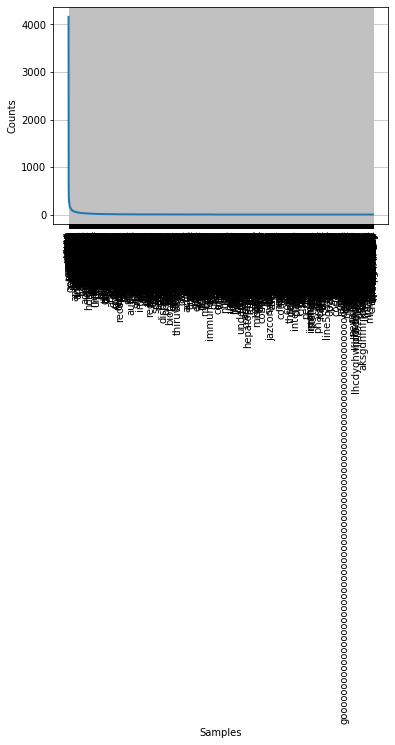

In [ ]:
nlp.plot()

In [ ]:
nlp.tf_idf('relief', tfidf_doc[0] )

0.0

In [ ]:
TFIDF = []

for doc in tfidf_doc:
    current = {}
    for token in doc:
        current[token] = nlp.tf_idf(token, doc)
        
    TFIDF.append(current)

In [ ]:
TFIDF

[{'typical': 0.0,
  'biden': 0.0,
  'receive': 0.0,
  'first': 0.0,
  'dose': 0.0,
  'vaccine': 0.0,
  'monday': 0.0,
  'digital': 0.0,
  'media': 0.0,
  'content': 0.0,
  'sector': 0.0,
  'affect': 0.0,
  'covid': 0.0,
  'us': 0.0,
  'experts': 0.0,
  'debate': 0.0,
  'next': 0.0,
  'line': 0.0,
  'via': 0.0,
  'watch': 0.0,
  'latest': 0.0,
  'edition': 0.0,
  'mayor': 0.0,
  'report': 0.0,
  'find': 0.0,
  'link': 0.0,
  'topics': 0.0,
  'mention': 0.0,
  'video': 0.0,
  'transcript': 5.155383804167573e-05,
  'include': 0.0,
  'information': 0.0,
  'resources': 0.0,
  'update': 0.0,
  'city': 0.0,
  'dei': 5.155383804167573e-05,
  'initiatives': 0.0,
  'police': 0.0,
  'department': 0.0,
  'policy': 0.0,
  'review': 0.0,
  'reform': 0.0,
  'work': 0.0,
  'pfizer': 0.0,
  'full': 0.0,
  'view': 0.0,
  'north': 0.0,
  'inishowen': 5.155383804167573e-05,
  'see': 0.0,
  'jump': 0.0,
  'case': 0.0,
  'radio': 0.0,
  'donegal': 5.155383804167573e-05,
  'news': 0.0,
  'sport': 0.0,
  'thi

In [ ]:
def get_ngrams(text, length):
    from nltk.util import ngrams
    
    n_grams = ngrams(tokenize(text), length)
    return [ ' '.join(grams) for grams in n_grams]

In [ ]:
get_ngrams(tweets8['cleaned_text'], 2)

NameError: ignored

In [ ]:
# tfidf calculation - relevant words 
corpus = tfidf_doc

vectorizer = TfidfVectorizer()
embeddings = vectorizer.fit_transform(corpus)

embedding_array = embeddings.toarray()
# Retrieve the feature names/words in the list
words_vocab = vectorizer.get_feature_names()
print(words_vocab)


AttributeError: ignored

In [ ]:
# Funtion to get embeddings of the documents based on the method chosen - TFIDF, USE (Feature extraction)
def get_embeddings(method,documents):
    if method is 'tfidf':
        vectoriser = TfidfVectorizer()
        embeddings = vectoriser.fit_transform(documents)
        embeddings_dense = embeddings.toarray()
        return embeddings_dense
    elif method is 'use':
        modelpath = 'https://tfhub.dev/google/universal-sentence-encoder/4'
        model = hub.load(modelpath)
        embeddings = model(documents)
        return embeddings

In [ ]:
methods = ['tfidf','use']
method_embedding_dict = dict()
for method in methods:
  method_embedding_dict[method] = np.array(get_embeddings(method,cleaned_text_list))

AttributeError: ignored

NameError: ignored

In [ ]:
# Retrieve the feature names/words in the list
words_vocab = vectorizer.get_feature_names()
print(words_vocab)

In [ ]:
# Getting the TF-IDF weight of each word in corpus as DataFrame
words_vocab_df = pd.DataFrame(
    list(zip(words_vocab, np.ravel(embeddings.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

words_vocab_df = words_vocab_df.sort_values(by=["TF-IDF"], ascending=False)


NameError: ignored

In [ ]:
tdm = vectorizer.fit_transform(data['Ingredients'])

In [ ]:
vectorizer.vocabulary_.items()

In [ ]:
# Count samples per category
tweets['analysis'].value_counts()

Postive     2866
Negative    2425
Neutral     2420
Name: analysis, dtype: int64

In [ ]:
# Count samples per category
tweets['analysis'].value_counts(normalize=True)

Postive     0.371677
Negative    0.314486
Neutral     0.313837
Name: analysis, dtype: float64

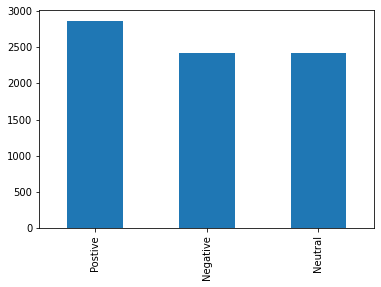

In [ ]:
x = tweets['analysis'].value_counts(normalize=True).to_list() #['Neutral', 'Positive', 'Negative']
y = tweets['analysis'].value_counts()[0:3].to_list()

sentiment_values = tweets['analysis'].value_counts()
sentiment_values.plot.bar()

**Cleaning the data**

In [ ]:

def clean_text(tweet):
  # function to clean tweets

    temp = tweet.lower()
    temp = re.sub(r'\\n'," ", temp) # removing \n -newline, replacing with a space
    temp = re.sub(r'&\S+',"  ", temp) #remove &amp, &gt
    temp = re.sub("@[a-z0-9_]+"," ", temp)
    temp = re.sub("#[a-z0-9_]+","  ", temp)
    temp = re.sub(r'http\S+', '  ', temp) # replace http followed by any non whitespace
    temp = re.sub(r'covid19|covid-19',"covid", temp) #na me put this
    temp = re.sub('[()!?]', '  ', temp)
    temp = re.sub('\[.*?\]','  ', temp)
    temp = re.sub("[^a-z0-9]", "  ", temp)  #removed the \ - _

    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp


In [ ]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?://[^\s\n\r]+', '', text)

https://catriscode.com/2021/05/01/tweets-cleaning-with-python/

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [ ]:
# here we are removing any stop words from the twitter texts 
stop_words = stopwords.words('english')
tweets['pre_cleaned_text'] = tweets['text'].apply(clean_text)

# here we are removing any stop words from the twitter texts 
#stopwords_ = stopwords.words('english') 
#tweets['text_removed_stopwords'] = tweets['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_))

wordnet_lemmatizer = WordNetLemmatizer()
tweets['cleaned_text'] = tweets['pre_cleaned_text'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(word, pos='v') for word in x.split()))
tweets

#https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

NameError: ignored

In [ ]:
# generate the wordcloud 
from wordcloud import WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#def wordcloud(df, text = 'cleaned_text'):
def wordcloud(text):
    
    # Join all tweets in one string
    corpus = " ".join(str(word) for word in text)
    print (f"A total of {len(corpus)} words combination in text.")
    
    wordcloud = WordCloud(random_state = 21, max_font_size=50, 
                          max_words=100,
                          #collocations = False,
                          #background_color="white"
                          ).generate(corpus)
    
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

#wordcloud(df = tweets)

A total of 641296 words combination in text.


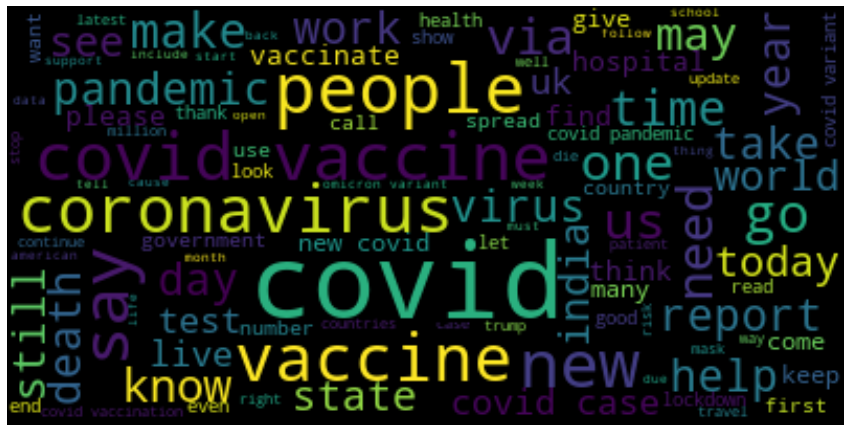

In [ ]:
# All tweet sentiments
all_tweets = tweets['cleaned_text']
wordcloud(all_tweets)

A total of 266960 words combination in text.


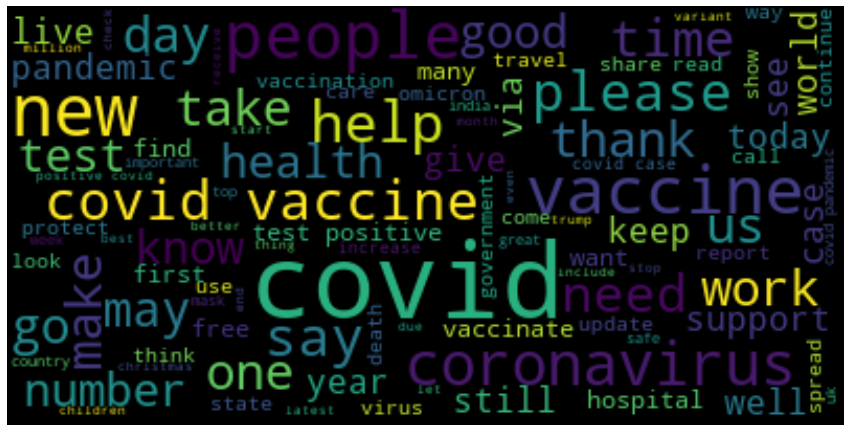

In [ ]:
# Positive tweets
positive_tweets = tweets[tweets['analysis']=='Postive']['cleaned_text']
wordcloud(positive_tweets)

A total of 225645 words combination in text.


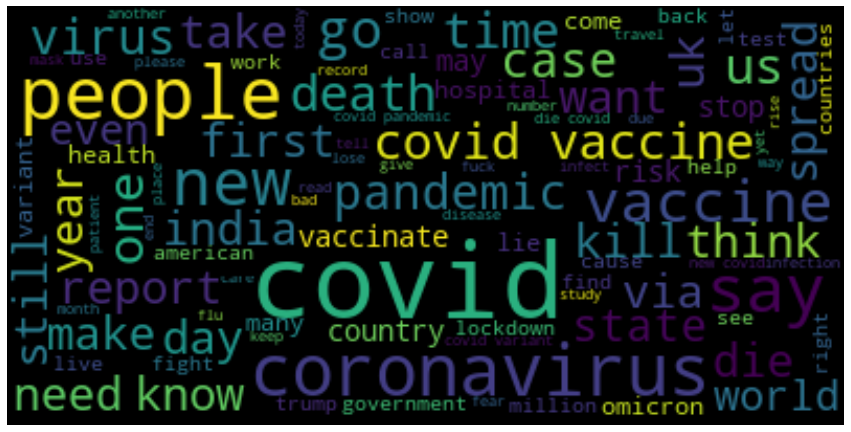

In [ ]:
# Negative tweets
negative_tweets = tweets[tweets['analysis']=='Negative']['cleaned_text']
wordcloud(negative_tweets)

A total of 148689 words combination in text.


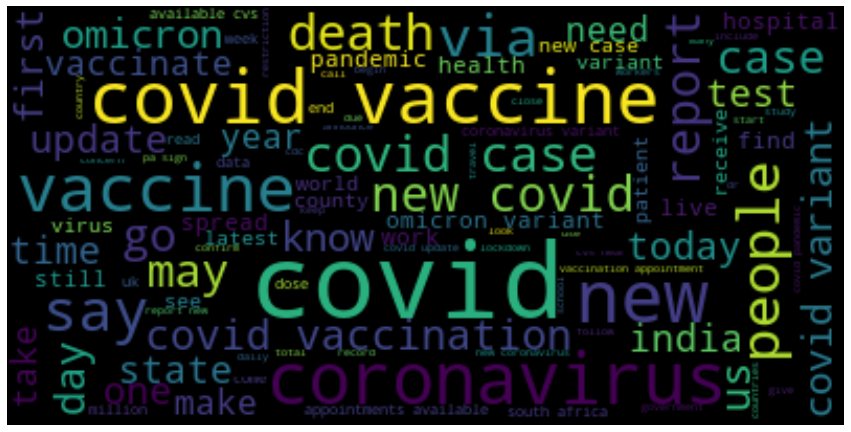

In [ ]:
# Neutral tweets
neutral_tweets = tweets[tweets['analysis']=='Neutral']['cleaned_text']
wordcloud(neutral_tweets)

**Sentiment Analysis after data Cleaning**

In [ ]:
# Apply the function to every row in the "text" column and output the results into a new column "sentiment_score"
tweets['sentiment_score_after_data_cleaning'] = tweets['cleaned_text'].apply(calculate_sentiment)
tweets['analysis_after_data_cleaning'] = tweets['sentiment_score_after_data_cleaning'].apply(getCategory)
tweets[['text', 'cleaned_text','sentiment_score', 'sentiment_score_after_data_cleaning', 'analysis', 'analysis_after_data_cleaning']].head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


text  ... analysis_after_data_cleaning
0   So typical https://t.co/IidUKML06T                                                                                                                                                                                                                                                                                                         ...  Neutral                    
1   With the ongoing pandemic, it’s hard to tell if schools and universities will be opening their doors to students any time soon so we've compiled some tips to help you survive another Covid-19 school year (just in case!) https://t.co/T2hZk7Dfy1 https://t.co/o4vbcs1Aqy                                                                ...  Postive                    
2   Interesting read.\n#COVID19 #globalpandemic #vaccine #TrustThePlan\nhttps://t.co/CZ4EqgXVB7                                                                                                                                                                                                                                                ...  Postive                    
3   .@miraina057:  Actually #TrumpCrimeFamily will siphon-off contributions from #COVID19 and other #charities!  \n\nShame on the #DonTheCon #Trumpers! https://t.co/Cy1UfO2vgW https://t.co/Z0BBGd5Gzl                                                                                                                                        ...  Negative                   
4   Biden to receive first dose of coronavirus vaccine on Monday https://t.co/OA1QblNfPA                                                                                                                                                                                                                                                       ...  Neutral                    
5   I’d very strongly advise my friends and family to please avoid all travel right now. \n\nhttps://t.co/pCECWAf1x3                                                                                                                                                                                                                           ...  Postive                    
6   If only we had shut down for two lousy months.\n\nWe'd have had all summer and fall would have been normal.\n\n"Muh freedums...  Muh freedums..."\n\nYeah, two months acknowledging Mother Nature was real was too much for you huh? https://t.co/fXJqHpBTOz                                                                               ...  Negative                   
7   honestly they need to cancel all of these shows for a little while ,,,, https://t.co/0giwnUShJo                                                                                                                                                                                                                                            ...  Postive                    
8   Nurse Collapses on Live Television shortly after receiving COVID-19 VACCINE https://t.co/q50AVACSpf @YouTubeより                                                                                                                                                                                                                             ...  Negative                   
9   Maskless Santa tests positive for COVID-19 after South Carolina event with families https://t.co/MKZXor0Bg4                                                                                                                                                                                                                                ...  Postive                    
10  How the digital media and content sector has been affected by covid-19 https://t.co/4W9naDZ9PK                                                                                                                                                                                       

In [ ]:
tweets8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7711 entries, 0 to 7710
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  7711 non-null   int64 
 1   conversation_id     7711 non-null   int64 
 2   author_id           7711 non-null   int64 
 3   created_at          7711 non-null   object
 4   text                7711 non-null   object
 5   source              7711 non-null   object
 6   like_count          7711 non-null   int64 
 7   reply_count         7711 non-null   int64 
 8   retweet_count       7711 non-null   int64 
 9   entities.urls       6472 non-null   object
 10  author_description  6969 non-null   object
 11  followers_count     7711 non-null   int64 
 12  following_count     7711 non-null   int64 
 13  tweet_count         7711 non-null   int64 
 14  date                7711 non-null   object
 15  variant             7711 non-null   object
 16  hour                7711

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=[‘Total’,’Percentage’])#Count_values for sentiment
 
count_values_in_column(tweets, 'sentiment')

SyntaxError: ignored

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,”sentiment”)
names= pc.index
size=pc[“Percentage”]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color=’white’)
plt.pie(size, labels=names, colors=[‘green’,’blue’,’red’])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
tweets8.head(15)

Unnamed: 0                   id  ...  variant  hour
0   0           1340040283321331712  ...  beta     21  
1   1           1339797620773011456  ...  beta     5   
2   2           1339948913017667584  ...  beta     15  
3   3           1340002369954865153  ...  beta     18  
4   4           1340000394647400448  ...  beta     18  
5   5           1340046487124758528  ...  beta     21  
6   6           1340054460437970944  ...  beta     22  
7   7           1339809689861812224  ...  beta     5   
8   8           1339901286834032640  ...  beta     11  
9   9           1340058013311315975  ...  beta     22  
10  10          1339979353791352834  ...  beta     17  
11  11          1340078445196402690  ...  beta     23  
12  12          1340080424094150656  ...  beta     23  
13  13          1339940250194481162  ...  beta     14  
14  14          1340010108097622018  ...  beta     19  

[15 rows x 18 columns]

In [ ]:
#gives a brief description of the numerical columns
tweets8.describe()

Unnamed: 0            id  ...   tweet_count         hour
count  7711.000000  7.711000e+03  ...  7.711000e+03  7711.000000
mean   3855.000000  1.404226e+18  ...  7.242551e+04  12.594346  
std    2226.118296  5.111256e+16  ...  1.879418e+05  6.595769   
min    0.000000     1.339725e+18  ...  1.000000e+00  0.000000   
25%    1927.500000  1.342575e+18  ...  4.378500e+03  7.000000   
50%    3855.000000  1.394162e+18  ...  1.796000e+04  14.000000  
75%    5782.500000  1.465403e+18  ...  6.240100e+04  18.000000  
max    7710.000000  1.467643e+18  ...  3.976402e+06  23.000000  

[8 rows x 11 columns]

The first function cleanText takes the text data and removes unnecessary elements of the text like hashtag symbol, retweets, and hyperlinks. This method is very among Natural Processing Language techniques. Before performing sentiment analysis, we would have to eliminate stop words which are redundant words that are unnecessary in the text to analyze like the words 'the', 'there', 'and', etc. The other task to perform lemmatization of the text where we set the text to its base form.

The word cloud for texts both positive and negative contain common words like COVID, people, vaccine, say, etc. 

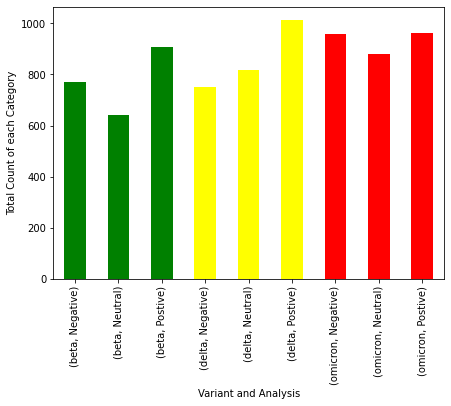

In [ ]:
byVariant = tweets8.groupby(['variant','analysis'])['text'].count()
plt.figure(figsize=(7,5))
byVariant.plot.bar(color=['green', 'green', 'green', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red'])
plt.xlabel("Variant and Analysis")
plt.ylabel("Total Count of each Category")
plt.show()

The comparison between variants would not be fair sense the number of observations is not the same but the relative scaled among sentiment works. There is noticeable more positve sentiment for beta and delta variants, but the proportions strinked for omicron. There was an equal amount of negative sentiment as positive sentiment for the omicron variant unlike the previous two variants.

In [ ]:
(tweets8
 .corr(method='spearman')
 .style.background_gradient(cmap='PiYG', vmax=1, vmin=-1)
 )

The addition to the correlation plot unlike the preliminarly analysis is the inclusion of the sentiment_score. However; there is not significant correlation with other features. There may be an issue with Simpson's Paradox where hidden timepoints could tie to strong relationship.

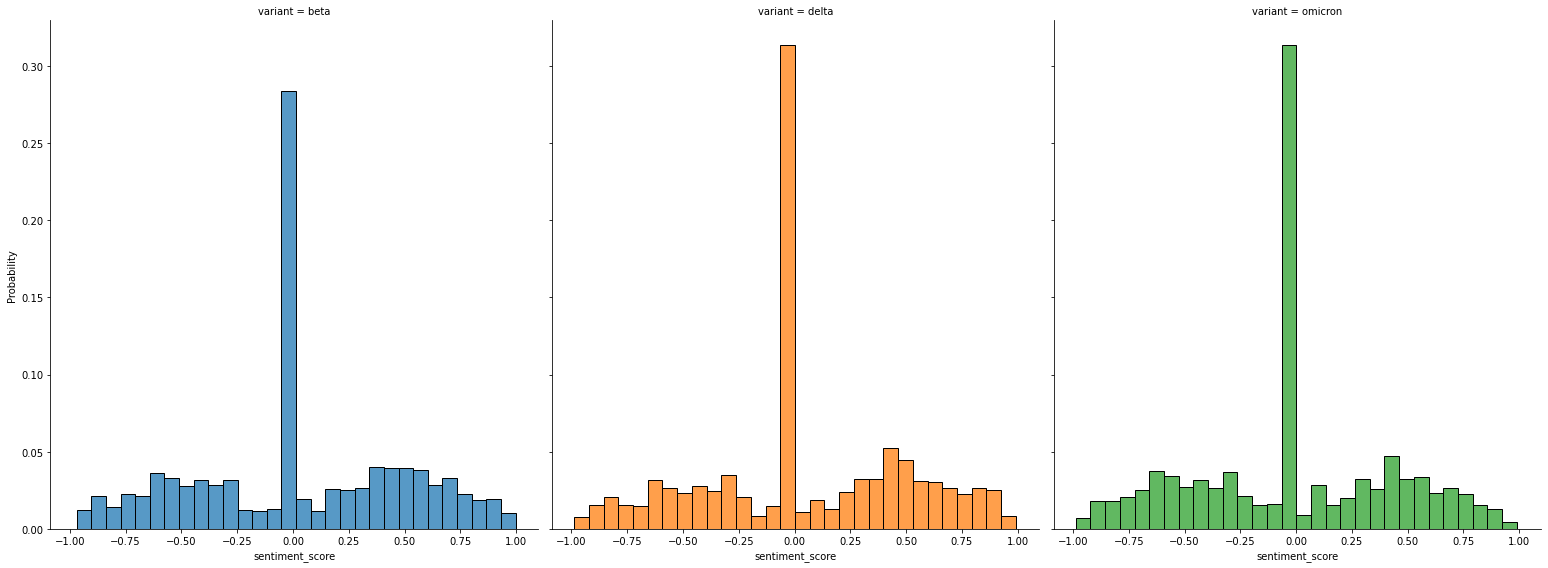

In [ ]:
#the histogram of hour across the variant
sea = sns.FacetGrid(tweets8, col = "variant", hue='variant', height = 8, aspect=0.9)
sea.map(sns.histplot, "sentiment_score", stat='probability', bins=30)
plt.tight_layout()
plt.show()

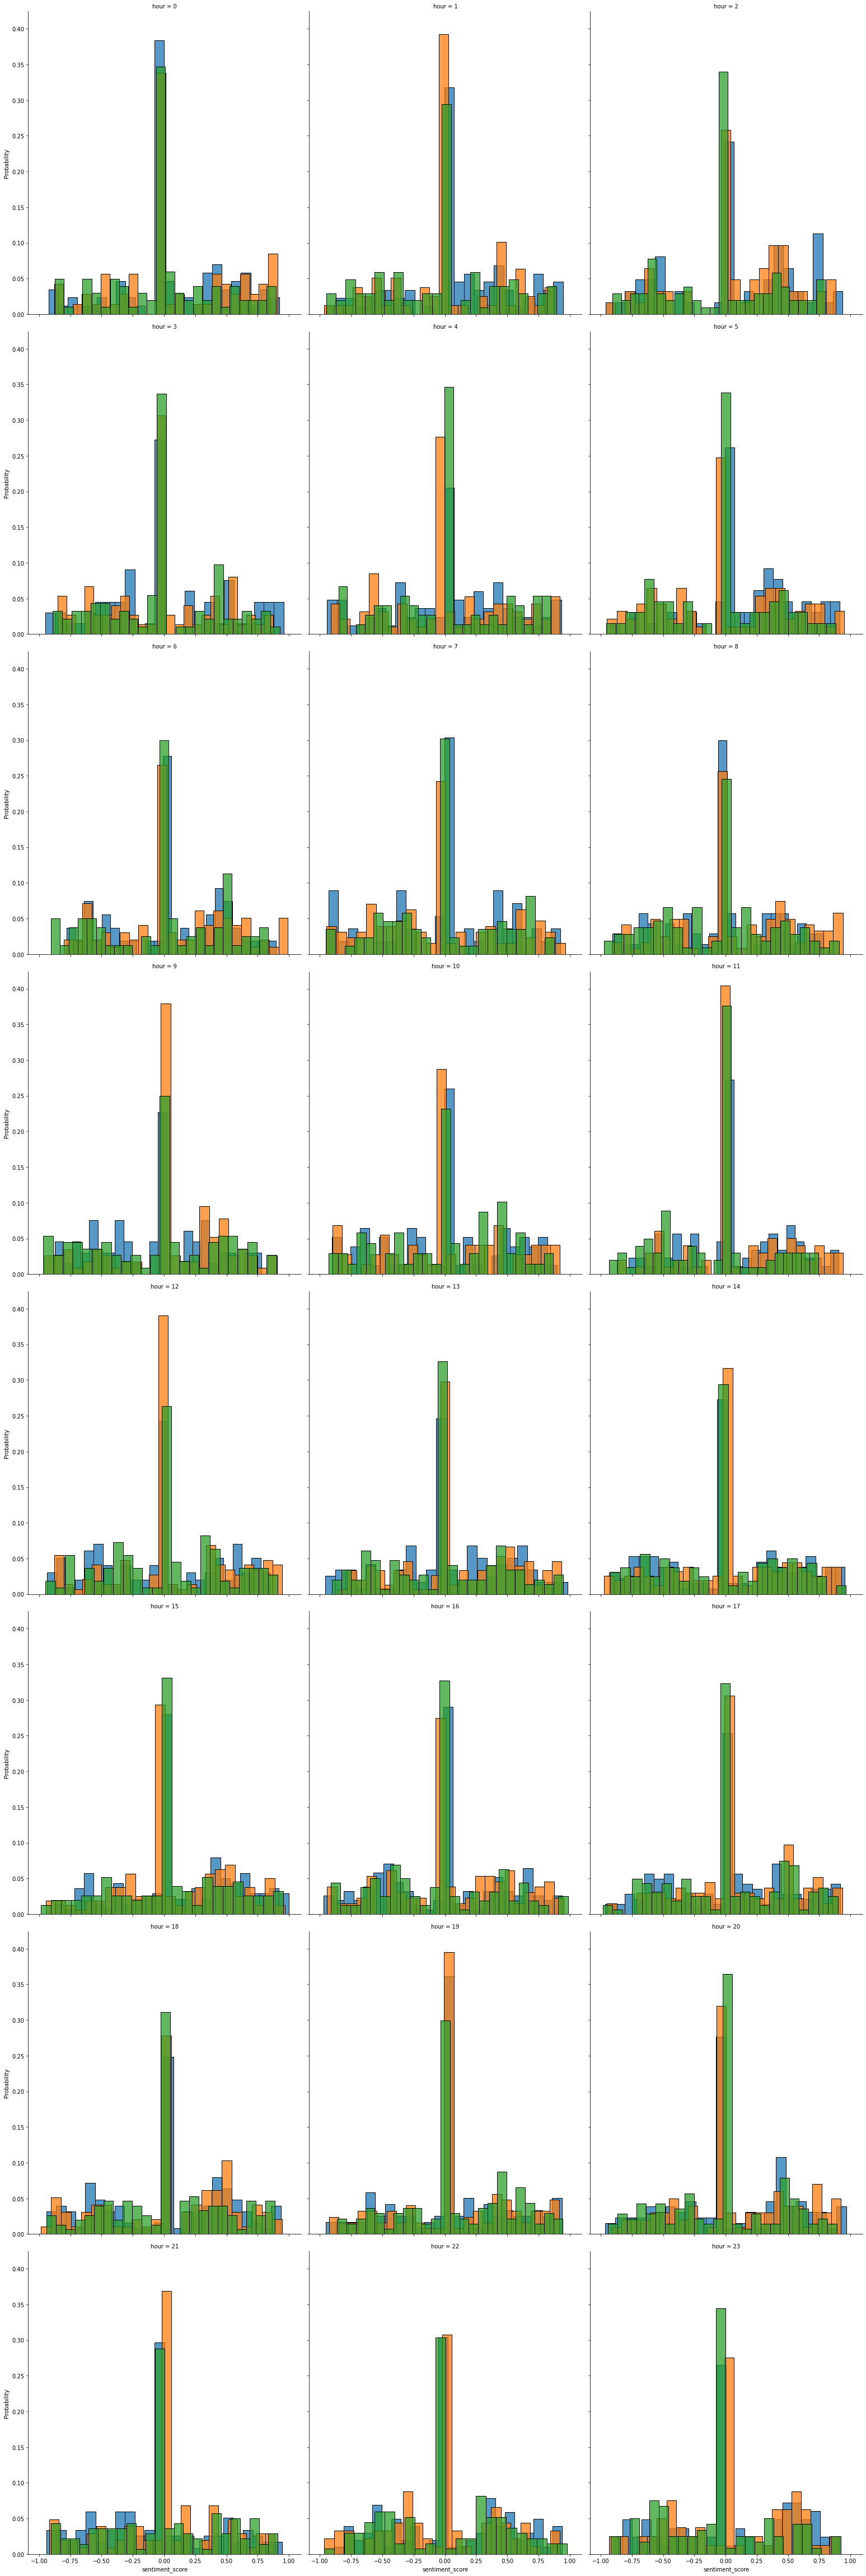

In [ ]:
#the histogram of hour across the variant
sea = sns.FacetGrid(tweets8, col = "hour", hue='variant', height = 8, aspect=0.9, col_wrap=3)
sea.map(sns.histplot, "sentiment_score", stat='probability', bins=24)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


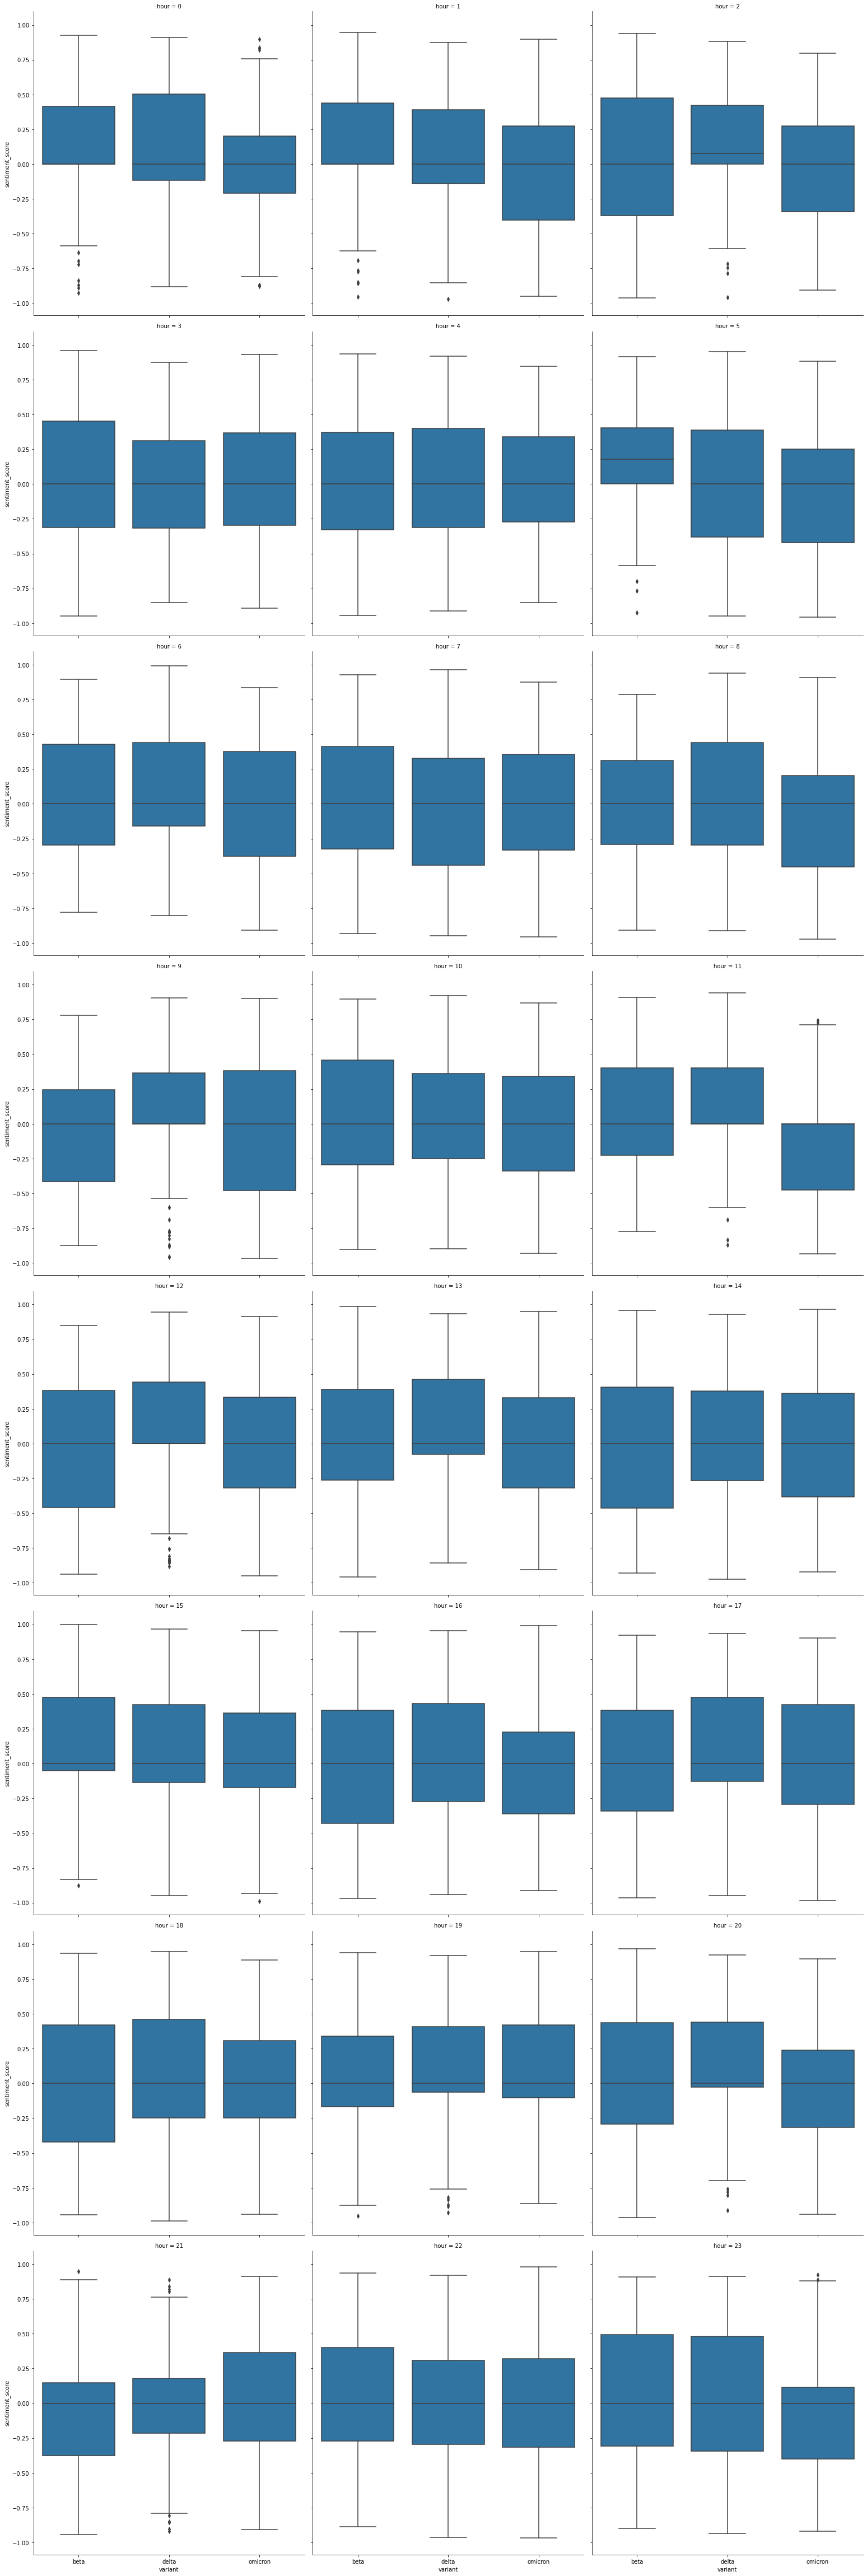

In [ ]:
#the histogram of hour across the variant
sea = sns.FacetGrid(tweets8, col = "hour", height = 8, aspect=0.9, col_wrap=3)
sea.map(sns.boxplot, "variant", "sentiment_score")
plt.tight_layout()
plt.show()

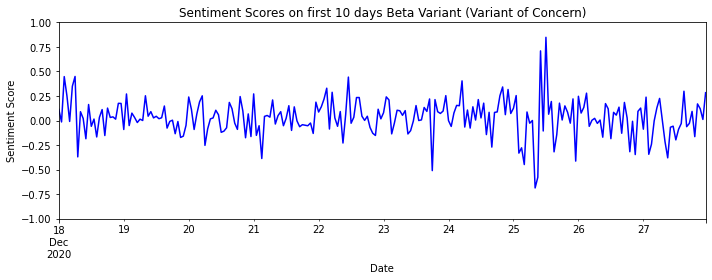

In [ ]:
tweets8.loc[tweets8['variant']=='beta'].set_index('created_at')['sentiment_score'].resample('H').mean().plot(figsize = (10,4), color='blue')
plt.title("Sentiment Scores on first 10 days Beta Variant (Variant of Concern)")
plt.ylabel("Sentiment Score")
plt.xlabel("Date")
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

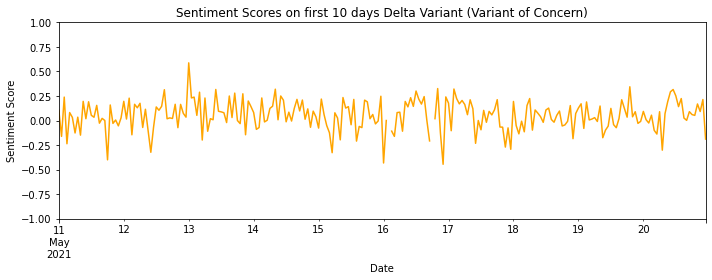

In [ ]:
tweets8.loc[tweets8['variant']=='delta'].set_index('created_at')['sentiment_score'].resample('H').mean().plot(figsize = (10,4), color='orange')
plt.title("Sentiment Scores on first 10 days Delta Variant (Variant of Concern)")
plt.ylabel("Sentiment Score")
plt.xlabel("Date")
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

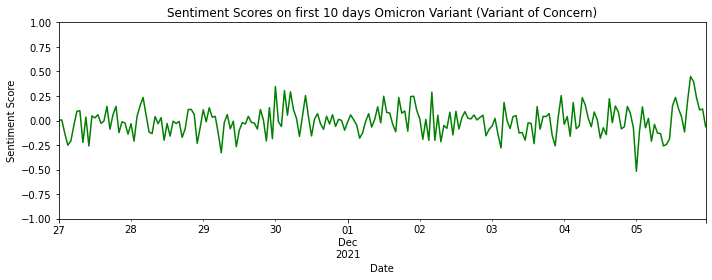

In [ ]:
tweets8.loc[tweets8['variant']=='omicron'].set_index('created_at')['sentiment_score'].resample('H').mean().plot(figsize = (10,4), color='green')
plt.title("Sentiment Scores on first 10 days Omicron Variant (Variant of Concern)")
plt.ylabel("Sentiment Score")
plt.xlabel("Date")
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

It seems to be more noise for the beta variant compared to the other variants.The most noticeable spike is the event during Christmas 2020. We may have to look at important dates to see if there may be important news/events that tie to this behavior. 